In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import scipy.ndimage as nd
import skimage.measure

In [2]:
#%qtconsole

In [36]:
def display(images):
    fig = plt.figure(figsize=(100, 100))
    columns = len(images)
    rows = 1
    for i in range(1, columns*rows +1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(images[i-1])
    plt.show()

In [40]:
def is_obstacle(img_num,seuil):
    frame_g = cv2.imread('data_montsouris_1/frame_g_{}.jpg'.format(img_num),0)
    frame_d = cv2.imread('data_montsouris_1/frame_d_{}.jpg'.format(img_num),0)
    stereo = cv2.StereoBM_create(numDisparities=64, blockSize=11)
    disparity = stereo.compute(frame_g,frame_d)
    res = skimage.measure.block_reduce(disparity, (5,5), np.max)
    res = skimage.measure.block_reduce(res, (5,5), np.max)
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            if res[i,j]>200:
                res[i,j]=0
            else:
                res[i,j]=1
    if sum(sum(res))>seuil*res.shape[0]*res.shape[1]:
        return (True,frame_g,disparity,res)
    else: 
        return (False,frame_g,disparity,res)

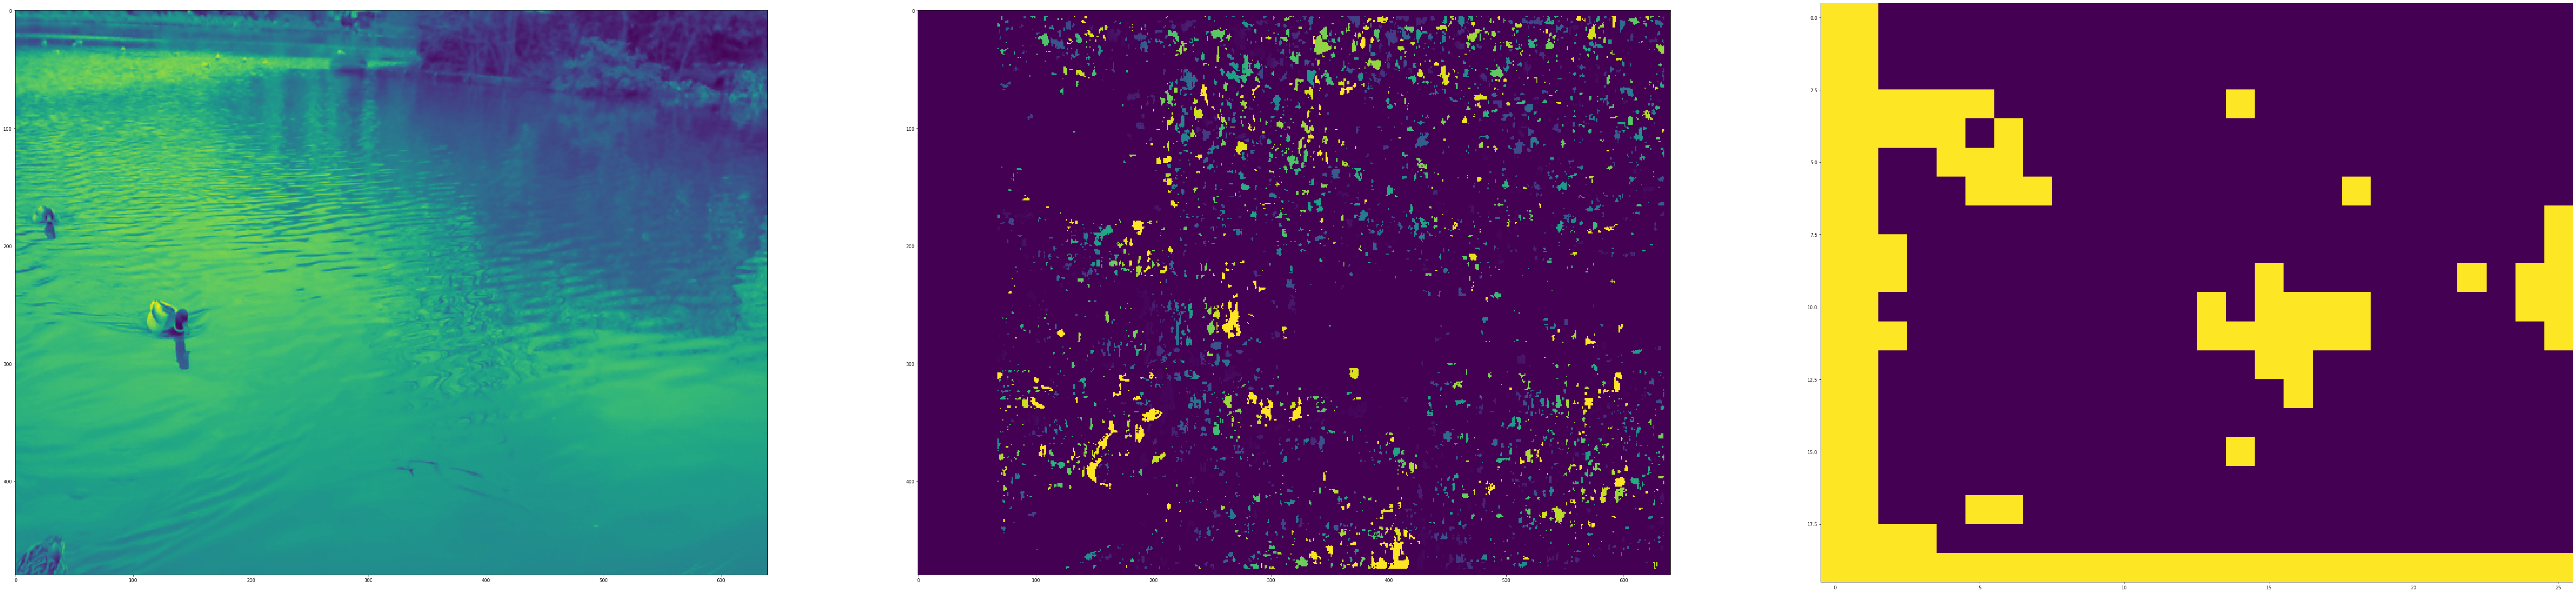

In [41]:
res = is_obstacle(1,4)
images = [res[1],res[2],res[3]]
display(images)

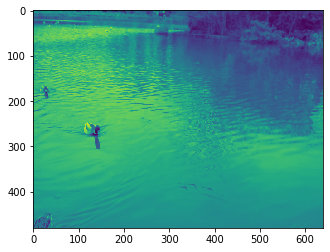

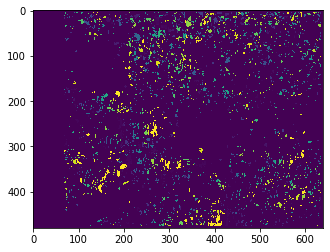

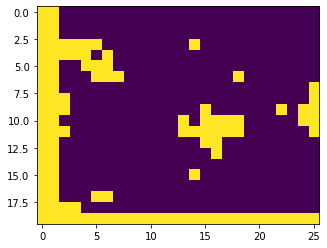

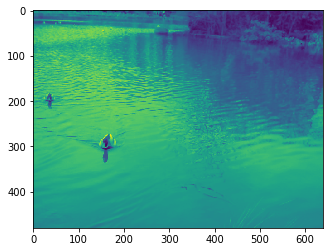

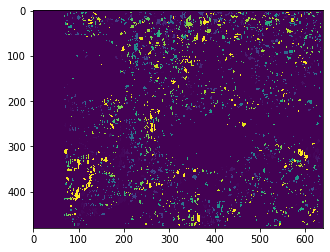

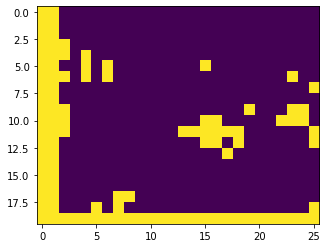

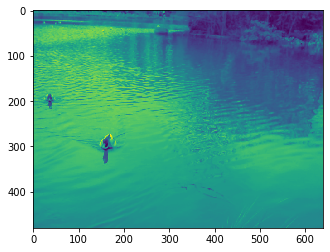

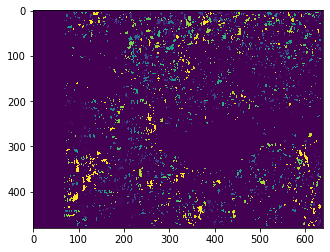

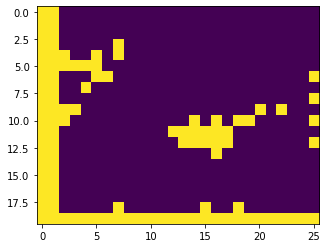

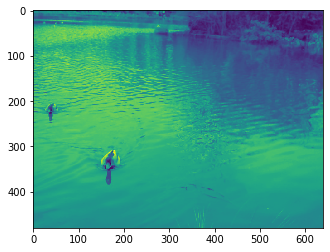

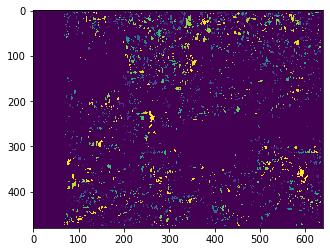

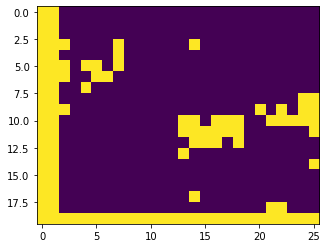

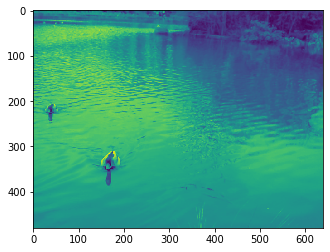

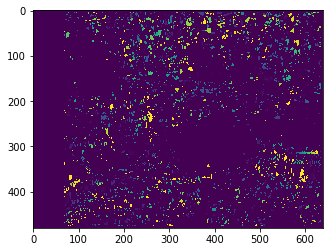

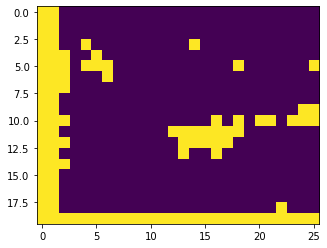

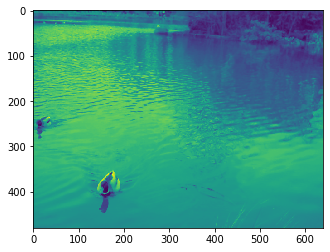

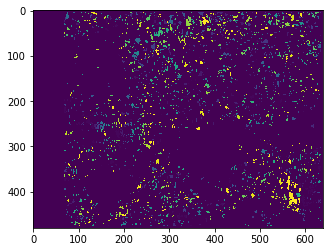

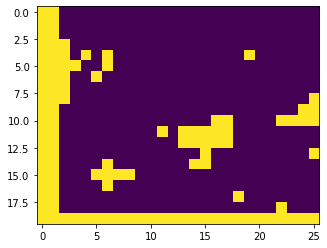

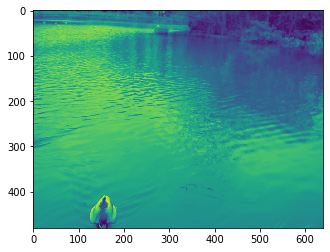

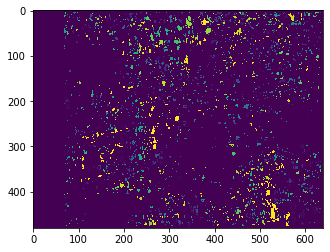

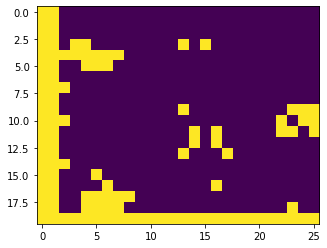

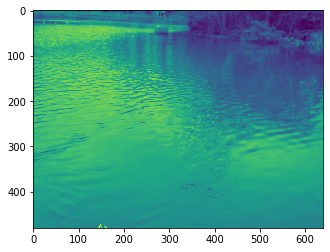

KeyboardInterrupt: 

In [45]:
for i in range(1,20):
    res = is_obstacle(i,0.2)
    plt.imshow(res[1])
    plt.show()
    plt.imshow(res[2])
    plt.show()
    plt.imshow(res[3])
    plt.show()

True


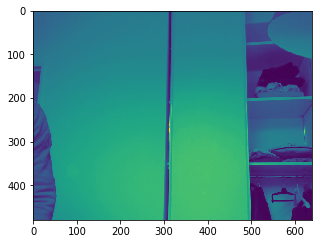

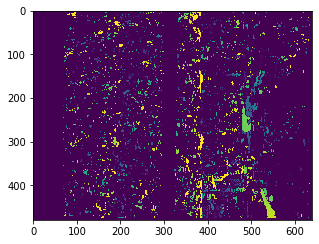

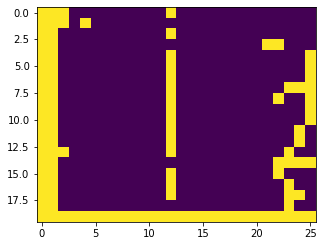

In [21]:
res = is_obstacle(1,0.2)
print(res[0])
plt.figure(figsize=(5,5))
plt.imshow(res[1])
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(res[2])
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(res[3])
plt.show()